<a href="https://colab.research.google.com/github/juliotorresma/Curso_MachineLearning/blob/main/Regresion_Logistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.datasets import make_circles, make_blobs
from sklearn.datasets import load_digits, load_breast_cancer
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# **Crear nuestros propios datos de entrada**

(50, 2)
[1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 1 0 0 0 0 0 1 0 1 1 1
 0 1 1 0 1 1 1 1 0 0 1 0 1]


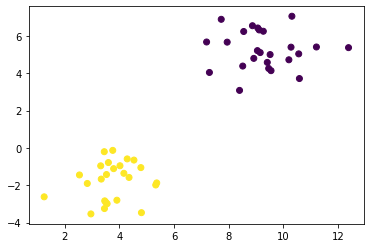

In [10]:
X, y = make_blobs(n_samples=50, n_features=2, centers=2)

plt.figure()
plt.scatter(X[:,0],X[:,1],c = y)
print(X.shape)
print(y)

In [14]:
model = LogisticRegression()
model.fit(X,y)

print(model.coef_)
print(model.intercept_)

[[-0.78689822 -0.98561416]]
[6.72422565]


In [16]:
w0 = model.intercept_
w1 = model.coef_[0][0]
w2 = model.coef_[0][1]
# y = b + mx
m = -w1/w2
b = -w0/w2

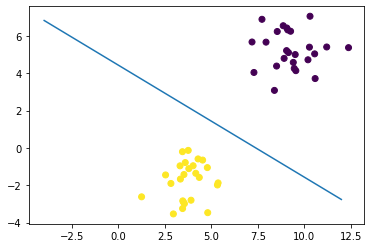

In [21]:
plt.figure()
#Dibujamos todas las muestras
plt.scatter(X[:,0],X[:,1],c = y)
#Dibujamos la recta que segmenta a nuetros datos
#Coordenadas de donde inicia y termina mi linea de discriminacion
#         X1,Y1     X2        Y2
plt.plot([-4,12],[b+(0*m),b+12*m])
plt.show()

# **Clasificacion de numeros**

In [24]:
X, Y = load_digits(return_X_y=True)

Xtrain, Xtest, ytrain, ytest = train_test_split(X,Y,  test_size = .30,  random_state = 42)
print("X",X.shape)
print("Xtrain",Xtrain.shape)
print("Xtest",Xtest.shape)

X (1797, 64)
Xtrain (1257, 64)
Xtest (540, 64)


ytest = [0,1,2,3,4,5,6,7]
Xtest = [imagen0,imagen1,imagen2,.....,imagen7]


In [29]:
model = LogisticRegression()
model.fit(Xtrain,ytrain)

ypred = model.predict(Xtest)

print("Acc", accuracy_score(ytest,ypred))
print()

print(confusion_matrix(ytest,ypred))

Acc 0.9648148148148148

[[53  0  0  0  0  0  0  0  0  0]
 [ 0 47  1  0  0  0  0  0  2  0]
 [ 0  1 46  0  0  0  0  0  0  0]
 [ 0  0  1 52  0  1  0  0  0  0]
 [ 0  1  0  0 58  0  1  0  0  0]
 [ 0  1  0  0  0 62  1  1  0  1]
 [ 0  0  0  0  0  1 52  0  0  0]
 [ 0  0  0  0  0  1  0 53  0  1]
 [ 0  0  0  0  0  1  0  0 42  0]
 [ 0  0  0  1  0  0  0  0  2 56]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


# **Ejercicio:**

Cargar dataset load_breast_cancer y meterlo a una regresion logistica 
, calcular la accuracy.

# **Dataset Breast Cancer**

In [38]:
X_breast,Y_breast = load_breast_cancer(return_X_y=True)
Xtrain_breast, Xtest_breast, ytrain_breast, ytest_breast = train_test_split(X_breast,Y_breast, 
                                                                           test_size = 0.30, random_state = 42)

print("X",X_breast.shape)
print("Xtrain",Xtrain_breast.shape)
print("Xtest",Xtest_breast.shape)

X (569, 30)
Xtrain (398, 30)
Xtest (171, 30)


In [43]:
model = LogisticRegression()
model.fit(Xtrain_breast,ytrain_breast)
prediccion_breast = model.predict(Xtest_breast)
print("Accuracy", accuracy_score(ytest_breast,prediccion_breast))
probabilidades = np.exp(model.predict_log_proba(Xtest_breast))

print(prediccion_breast[:10])
print(probabilidades[:10])

Accuracy 0.9707602339181286
[1 0 0 1 1 0 0 0 1 1]
[[1.29943632e-01 8.70056368e-01]
 [9.99999995e-01 4.77203053e-09]
 [9.93164637e-01 6.83536279e-03]
 [3.32054967e-03 9.96679450e-01]
 [1.33694087e-03 9.98663059e-01]
 [9.99999999e-01 5.52525855e-10]
 [1.00000000e+00 8.92781363e-13]
 [9.95520395e-01 4.47960532e-03]
 [3.79692260e-03 9.96203077e-01]
 [1.83084371e-02 9.81691563e-01]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [44]:
data = load_breast_cancer()

print(data.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
